In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


In [65]:
data = pd.read_csv('insurance.csv') #verilerin olsuğu dosyayı okuyoruz ve data'ya aktarıyoruz
df = data.copy() #copy() veri üzerinde yapmış olduğumuz işlemlerin ana verilerimizi değiştirmeden yapmamızı sağlar
df.head() #okunan verinin ilk 5 satırını görmek için kullanılır.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
df.info() # veri hakkında bilgi edinmeye yarar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
df.isna().sum() #veride boş yerlerin toplamını gösterir.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
#merkezi eğilim ölçülerini görmek için kullanıyoruz. T ise tabloyu ters çevirir
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


bmi değerinin standart sapması 6 dır, bmi 15 ile 53 arasında normal dağılmış denilebilir. ancak üst çeyrekler açıklığı ortalamaya daha yakındır. bu sebeple yüksek bmi değerleri daha az sayıdadır denebilir.

<Axes: >

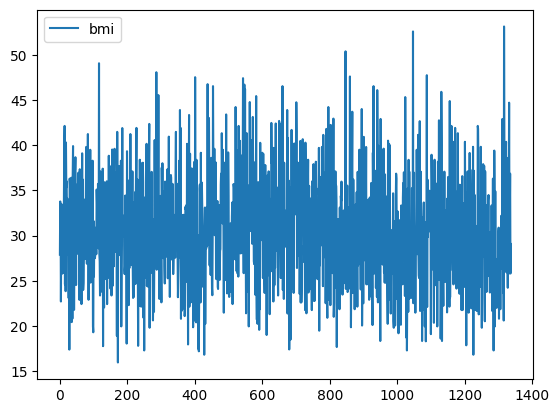

In [69]:
df.plot.line(y='bmi') #pandasın görselleştirme metotlarından line() kullanılabilir

bmi için veriler yaklaşık olarak 25 ile 35 arasında daha yoğunlukta olduğu söylenebilir.

In [70]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [71]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [72]:
df.corr()

<ipython-input-72-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


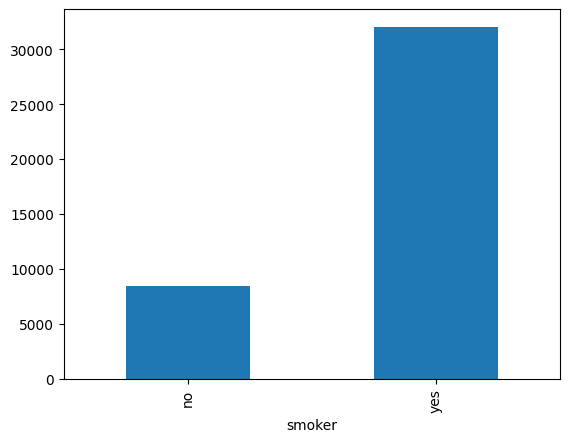

In [73]:
df.groupby("smoker")["charges"].mean().plot.bar();

sigara içenlerin sağlık harcamaları ortalaması daha yüksek



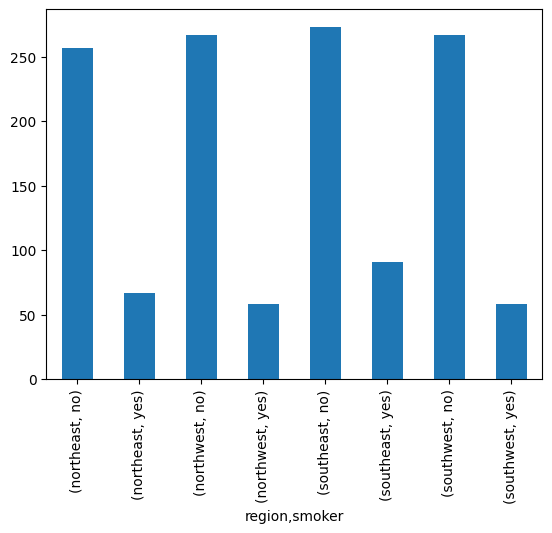

In [74]:
df.groupby("region")["smoker"].value_counts().plot.bar();


tüm bölgelerde sigara içenler içmeyenlere göre daha fazla


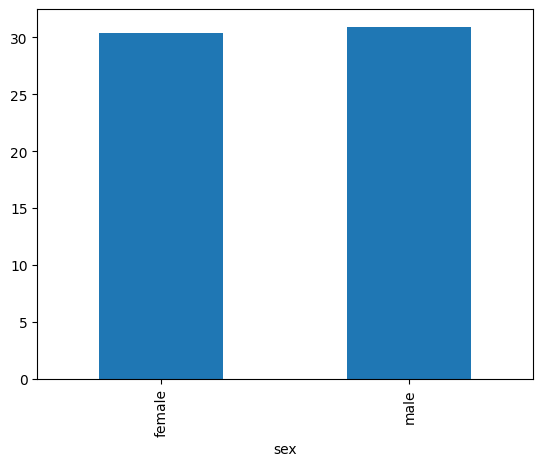

In [75]:
df.groupby("sex")["bmi"].mean().plot.bar();

Hem kadın hem de erkeklerin ortalama bmi si yaklaşık olarak benzerdir.

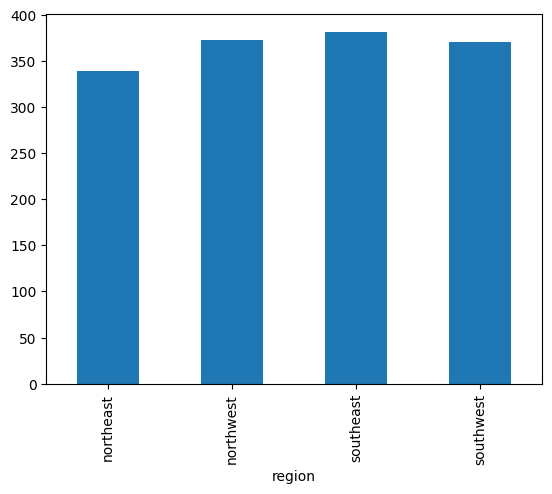

In [76]:
df.groupby("region")["children"].sum().plot.bar();

Southeast'te toplam çocuk sayısı diğer bölgelere göre daha fazladır.

<Axes: xlabel='age', ylabel='bmi'>

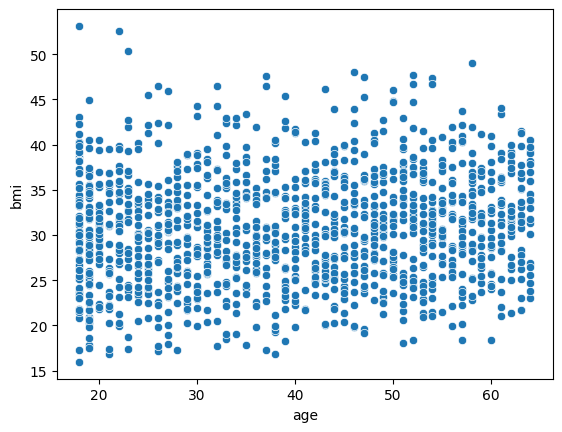

In [77]:
sns.scatterplot(x='age', y='bmi', data=df)

yaş ve bmi arasında anlamlı bir ilişki yoktur.

<Axes: xlabel='children', ylabel='bmi'>

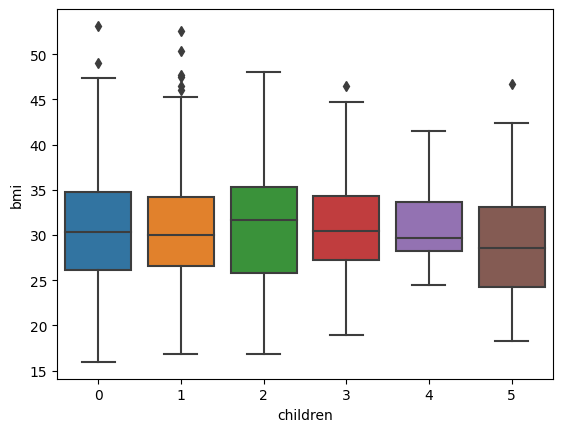

In [78]:
sns.boxplot(x='children', y='bmi', data=df)

çocuk sayısı ile bmi arasında anlamlı bir fark yoktur.

<Axes: >

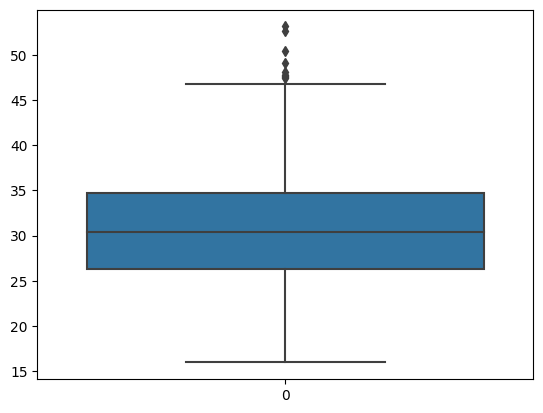

In [79]:
sns.boxplot(df['bmi'])

Kutunun üstünde kalan çizginin üzerindeli noktalar bmi için aykırı değer olarak değerlendirilebilir.

<Axes: xlabel='bmi', ylabel='charges'>

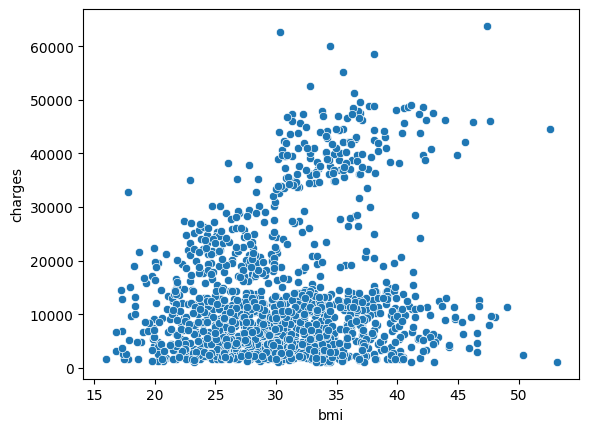

In [80]:
sns.scatterplot(x='bmi', y='charges', data=df)

BMI değeri arttıkça genel olarak maliyette artıyor. Ancak bu ilişki tam olarak doğrusal değil

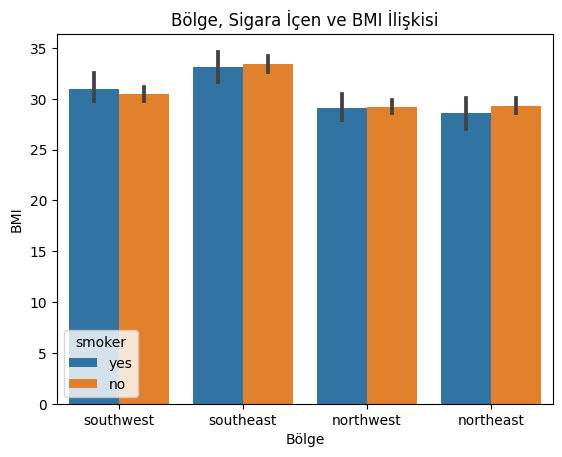

In [81]:
sns.barplot(x='region', y='bmi', hue='smoker', data=df)
plt.title('Bölge, Sigara İçen ve BMI İlişkisi')
plt.xlabel('Bölge')
plt.ylabel('BMI')
plt.show()

Bölgelere göre ortalama bmi değerlerine baktığımızda sigara içenlerle içmeyenler arasında çok büyük bir fark olmadığını görebiliriz. Ancak genel olarak güneydoğu bölgesindeki bireylerin bmi biraz daha yüksek görünüyor.

# **Data Preprocessing**

In [82]:
lb = LabelEncoder()

LabelEncoder() ile sex ve smoker objectlerini categorye çevirdim

In [83]:
df["sex"] = lb.fit_transform(df["sex"])
df["smoker"] = lb.fit_transform(df["smoker"])

In [84]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Female 0 man 1 , smoker 1, non smoker 0 olarak kategorize ettim

In [85]:

# Region için One-Hot Encoding kullanımı
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
region_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[['region']]))
region_encoded.columns = [f'region{col}' for col in region_encoded.columns]
data = pd.concat([df, region_encoded], axis=1)

# Bölge sütununu tablodan silme işlemi
data.drop('region', axis=1, inplace=True)

In [86]:
X = data.drop('charges', axis=1)
y = data['charges']  # Hedef değişken

In [87]:
# Verileri eğitim ve test setlerine ayırma işlemi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

# Eğitim verilerini fit metodu ile öğretme ve dönüştürme işlemi
X_train_scaled = scaler.fit_transform(X_train)

# Test verileri üzerinde dönüştürme işlemi yapma
X_test_scaled = scaler.transform(X_test)

In [99]:
linear = LinearRegression()
ridge = Ridge()
rfr = RandomForestRegressor()
mlp = MLPRegressor()

# **Model Selection**

In [106]:
#Modelleri listeleyip for döngüsü ile performas ölçümü yaprım

regressor_models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor()
]

In [108]:
best_model = None
best_score = float('inf')

for model in regressor_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"- - -\n{model}\nMSE:{mse}\nMAE:{mae}\nr2:{r2}\n- - -")
    if mse < best_score:
        best_model = model
        best_score = mse

print("Best model:", best_model)

- - -
LinearRegression()
MSE:33780509.57479163
MAE:4145.450555627586
r2:0.7696118054369012
- - -
- - -
DecisionTreeRegressor()
MSE:38775330.47944917
MAE:2801.132221962687
r2:0.7355463699276391
- - -
- - -
RandomForestRegressor()
MSE:21173180.47343873
MAE:2590.8372963661695
r2:0.8555957004842105
- - -
- - -
SVR()
MSE:158620481.75287682
MAE:8233.127697612543
r2:-0.08181572367531897
- - -
- - -
KNeighborsRegressor()
MSE:118215999.13150214
MAE:7570.268645480099
r2:0.19374897089462761
- - -
Best model: RandomForestRegressor()


RandomForestRegressor() modelinin en iyi olduğunu tespit ettik

In [109]:
model = RandomForestRegressor()

# **Hyper-parameter Optimization**

In [110]:
from sklearn.model_selection import GridSearchCV

* n_estimators = öngörüdeki ağaç sayısı
* max_features = bir düğümü bölmek için dikkate alınan maksimum özellik sayısı
* max_depth = her karar ağacındaki maksimum seviye sayısı
* min_samples_split = düğüm bölünmeden önce düğüme yerleştirilen minimum veri noktası sayısı
* min_samples_leaf = yaprak düğümde izin verilen minimum veri noktası sayısı
* bootstrap = veri noktalarını örnekleme yöntemi (değiştirilerek veya değiştirilmeden)



In [115]:
param_grid = {
    'bootstrap': [True, False],
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [116]:
clf = GridSearchCV(rfr, param_grid, cv = 10, scoring='r2')
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.8361083458955759


In [117]:
print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.8361083458955759


In [118]:
grid_y_pred = clf.predict(X_test)

# **Model Evaluation**



 Regresyon modeli değerlendirme ölçümlerini kullanarak optimize edilmiş modeli değerlendirme işlemi.

In [126]:
print(mean_squared_error(y_test, grid_y_pred))
print(mean_absolute_error(y_test, grid_y_pred))
print(r2_score(y_test, grid_y_pred))

19247067.79652266
2493.5543691359235
0.8687320808332784
